# Part 1

## Import Data

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
#Create a data file path
login_data_path = "/home/dqminhv/Springboard/Take_home_challenge/data/logins.json"

In [4]:
#Load the dataset to a pandas dataframe
login_df = pd.read_json(login_data_path)

In [5]:
#Look at the first few rows of the dataset
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


**The dataset is not sorted by the login time. We will sort the dataset by ascending order.**

In [6]:
login_df_sorted = login_df.sort_values('login_time')

In [7]:
login_df_sorted.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [8]:
#Determine the start and end time.
print(login_df_sorted['login_time'].min(), " | ",login_df_sorted['login_time'].max())

1970-01-01 20:12:16  |  1970-04-13 18:57:38


In [9]:
#Create 'date' and 'time' columns.
login_df_sorted['date'] = login_df_sorted['login_time'].dt.date
login_df_sorted['time'] = login_df_sorted['login_time'].dt.time

We split each day into 15-min periods.
Each day will have 96 intervals, start from 00:00:00 to 23:45:00
We will then assign each login to a corressponding interval.

In [10]:
#Create a list of time interval during a day with 15 minutes interval.
#Define start and end times
start_time = datetime.strptime('00:00:00', '%H:%M:%S')
end_time = datetime.strptime('23:59:59', '%H:%M:%S')

# Create a list of times with 15-minute intervals
time_list = []
current_time = start_time
while current_time <= end_time:
    time_list.append(current_time.strftime('%H:%M:%S'))
    current_time += timedelta(minutes=15)

In [11]:
def convert_interval_to_time(interval):
    """
    This function take
    """
    interval_duration = timedelta(minutes=15)
    start_time = timedelta(hours=0, minutes=0)  # 00:00:00
    time = start_time + interval * interval_duration
    return time

def determine_time_interval(date):
    """
    Each day is divided into 96 15-min interval, starting from 00:00:00 and ends at 23:59:00.
    This function takes an input of a time during a day and return the time interval (1 to 96) that it belongs to.
    """
    # Calculate time interval size in minutes
    total_intervals = 96
    interval_duration = 24 * 60 // total_intervals  # 24 hours in minutes

    # Convert the input date to a datetime object
    #datetime_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

    # Get the time from the datetime object
    time = date.time()

    # Calculate the time in minutes
    total_minutes = time.hour * 60 + time.minute

    # Calculate the interval the time belongs to
    interval = total_minutes // interval_duration

    return convert_interval_to_time(interval)

In [12]:
login_df_sorted['interval'] = login_df_sorted['login_time'].apply(determine_time_interval)

In [13]:
login_df_sorted.head()

,login_time,date,time,interval
6,1970-01-01 20:12:16,1970-01-01,20:12:16,0 days 20:00:00
0,1970-01-01 20:13:18,1970-01-01,20:13:18,0 days 20:00:00
1,1970-01-01 20:16:10,1970-01-01,20:16:10,0 days 20:15:00
3,1970-01-01 20:16:36,1970-01-01,20:16:36,0 days 20:15:00
2,1970-01-01 20:16:37,1970-01-01,20:16:37,0 days 20:15:00


## Count the number of logins by each time interval of a day

In [14]:
login_count_df = login_df_sorted.groupby(['date', 'interval'], as_index=False).count().drop(columns=['login_time'])

In [15]:
login_count_df.rename(columns={'time':'count'}, inplace=True)

In [16]:
login_count_df.head(100)

,date,interval,count
0,1970-01-01,0 days 20:00:00,2
1,1970-01-01,0 days 20:15:00,6
2,1970-01-01,0 days 20:30:00,9
3,1970-01-01,0 days 20:45:00,7
4,1970-01-01,0 days 21:00:00,1
5,1970-01-01,0 days 21:15:00,4
6,1970-01-01,0 days 21:45:00,4
7,1970-01-01,0 days 22:00:00,9
8,1970-01-01,0 days 22:15:00,8
9,1970-01-01,0 days 22:30:00,1


In [17]:
# Convert 'date' column to DateTime format
login_count_df['date'] = pd.to_datetime(login_count_df['date'])

# Merge 'date' and 'interval' into a new DateTime index
login_count_df['datetime'] = login_count_df['date'] + pd.to_timedelta(login_count_df['interval'])
login_count_df.set_index('datetime', inplace=True)

In [18]:
login_count_df.head(30)

,date,interval,count
datetime,,,
1970-01-01 20:00:00,1970-01-01,0 days 20:00:00,2
1970-01-01 20:15:00,1970-01-01,0 days 20:15:00,6
1970-01-01 20:30:00,1970-01-01,0 days 20:30:00,9
1970-01-01 20:45:00,1970-01-01,0 days 20:45:00,7
1970-01-01 21:00:00,1970-01-01,0 days 21:00:00,1
1970-01-01 21:15:00,1970-01-01,0 days 21:15:00,4
1970-01-01 21:45:00,1970-01-01,0 days 21:45:00,4
1970-01-01 22:00:00,1970-01-01,0 days 22:00:00,9
1970-01-01 22:15:00,1970-01-01,0 days 22:15:00,8


## Time Series EDA

## Create Time Series Plots

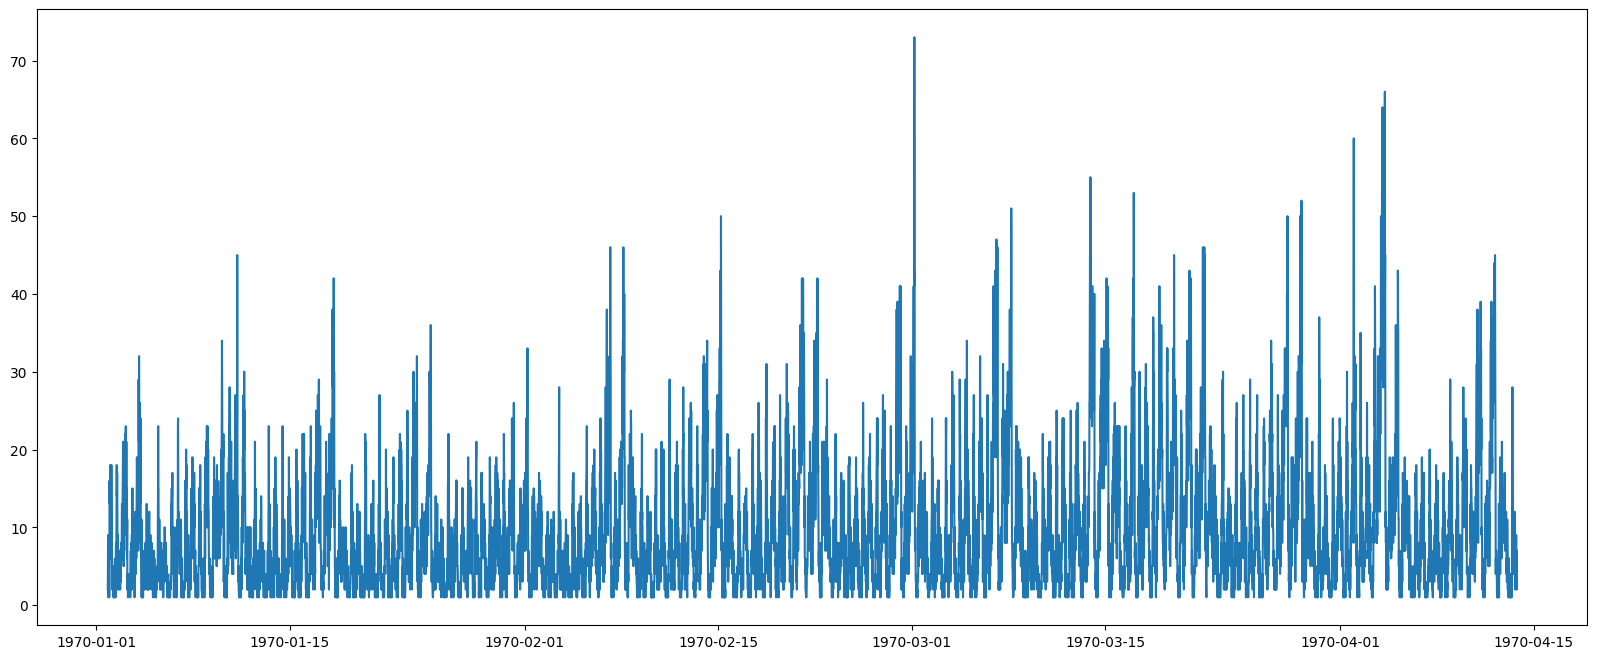

In [19]:
#Create a time series plot
plt.figure(figsize=(20,8))
plt.plot(login_count_df.index, login_count_df['count'], )

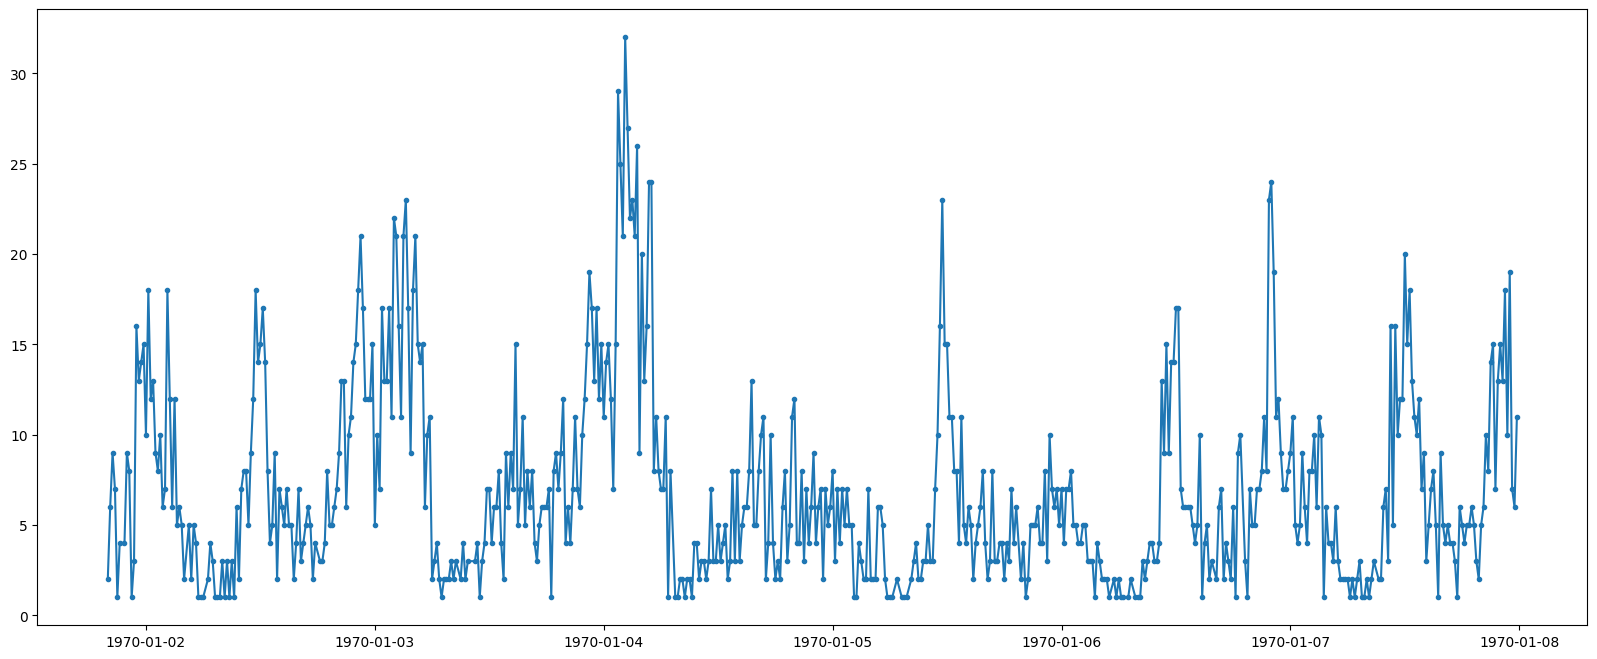

In [20]:
#Create a time series plot for 7 days
plt.figure(figsize=(20,8))
plt.plot(login_count_df[login_count_df['date'] < '1970-01-08']['count'], marker='.')

## ydata-profiling

In [21]:
from ydata_profiling import ProfileReport
profile = ProfileReport(login_count_df[['count']], tsmode=True)
profile.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

From the ydata-profiling report, we see that the data is not stationary and has seasonality.

## Descriptive Statistic

In [22]:
login_count_df['count'].describe()

count    9381.000000
mean        9.928792
std         8.263146
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        73.000000
Name: count, dtype: float64

<Axes: ylabel='count'>

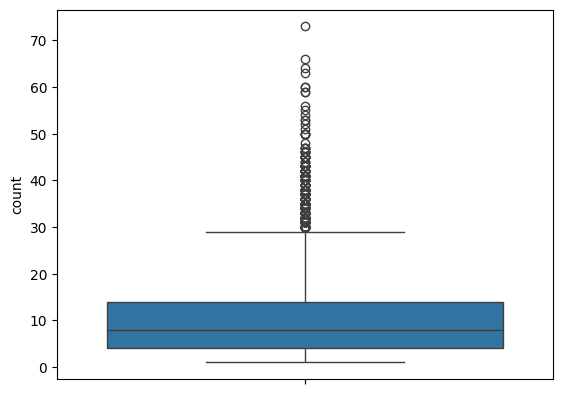

In [23]:
sns.boxplot(login_count_df['count'])

## Data insights

###

**We will look at the login pattern for each time interval of a day.**

In [24]:
login_25, login_50, login_75 = login_count_df['count'].quantile([0.25, 0.5, 0.75])

In [1]:
#Create boxplot for each time interval
plt.figure(figsize=(20,15))
graph = sns.boxplot(data=login_count_df, x=login_count_df.index.time, y='count', order=time_list)
graph.axhline(login_25, color='r')
graph.axhline(login_50, color='r')
graph.axhline(login_75, color='r')
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

**From the boxplot, we can see that there are 2 periods during a day that have high logins.**
* From around 00:00 to 03:00
* From around 10:30 to 13:00
* From around 22:00 to 00:00

###

**We'll then look at the login pattern by days of a week.**

In [26]:
login_count_df['day_of_week'] = login_count_df.index.day_name()

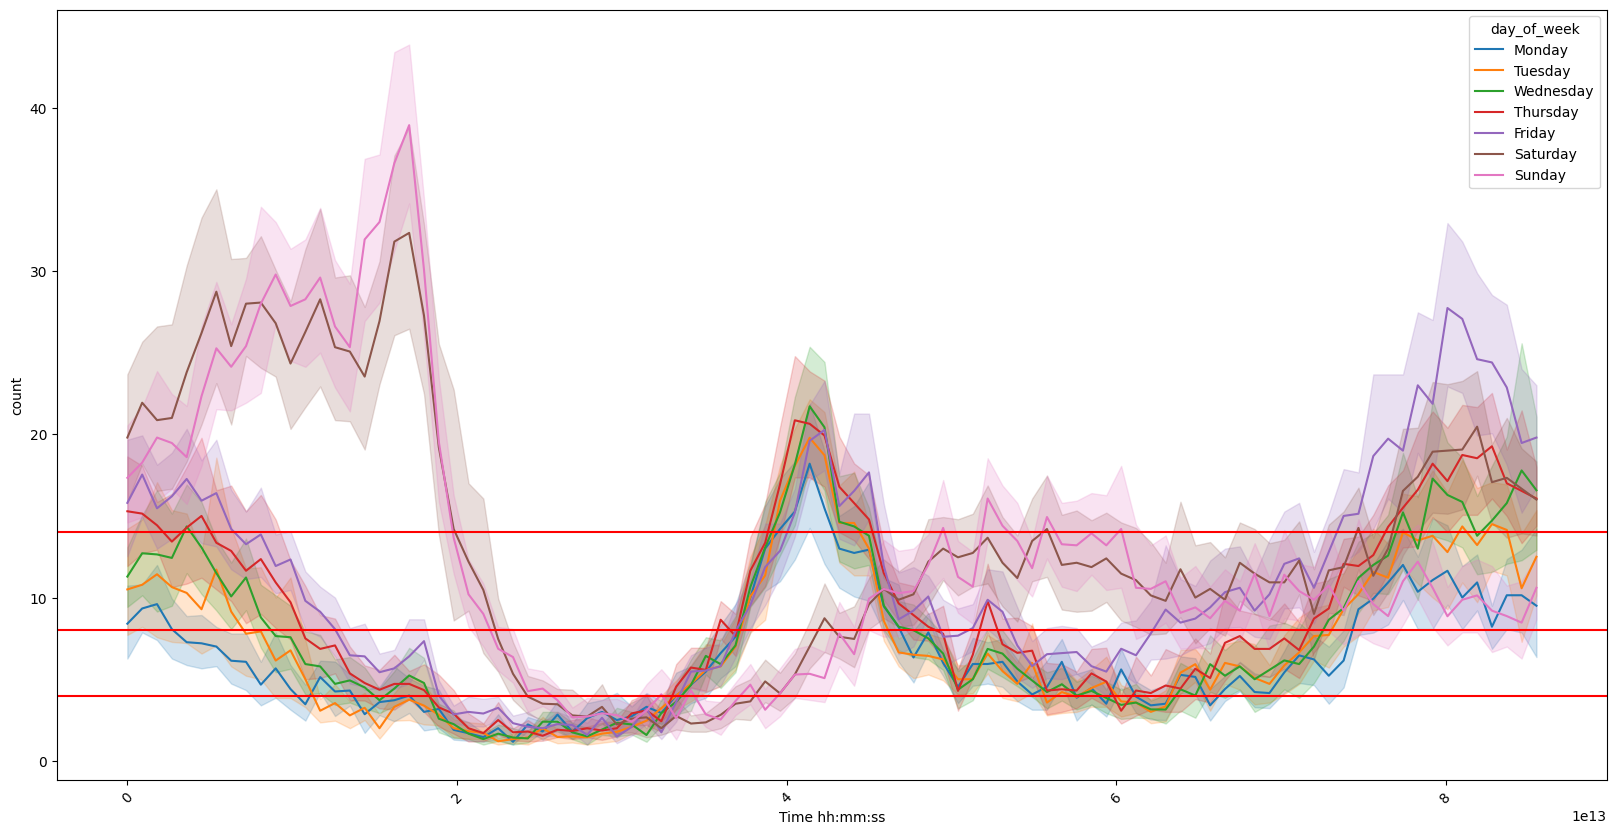

In [32]:
plt.figure(figsize=(20, 10))
graph = sns.lineplot(data=login_count_df, x='interval', y='count', hue='day_of_week',
          hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
graph.axhline(login_25, color='r')
graph.axhline(login_50, color='r')
graph.axhline(login_75, color='r')
plt.xlabel('Time hh:mm:ss')
plt.xticks(rotation=45)
plt.show()

**We'll create boxplot for each day of a week.**

In [34]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

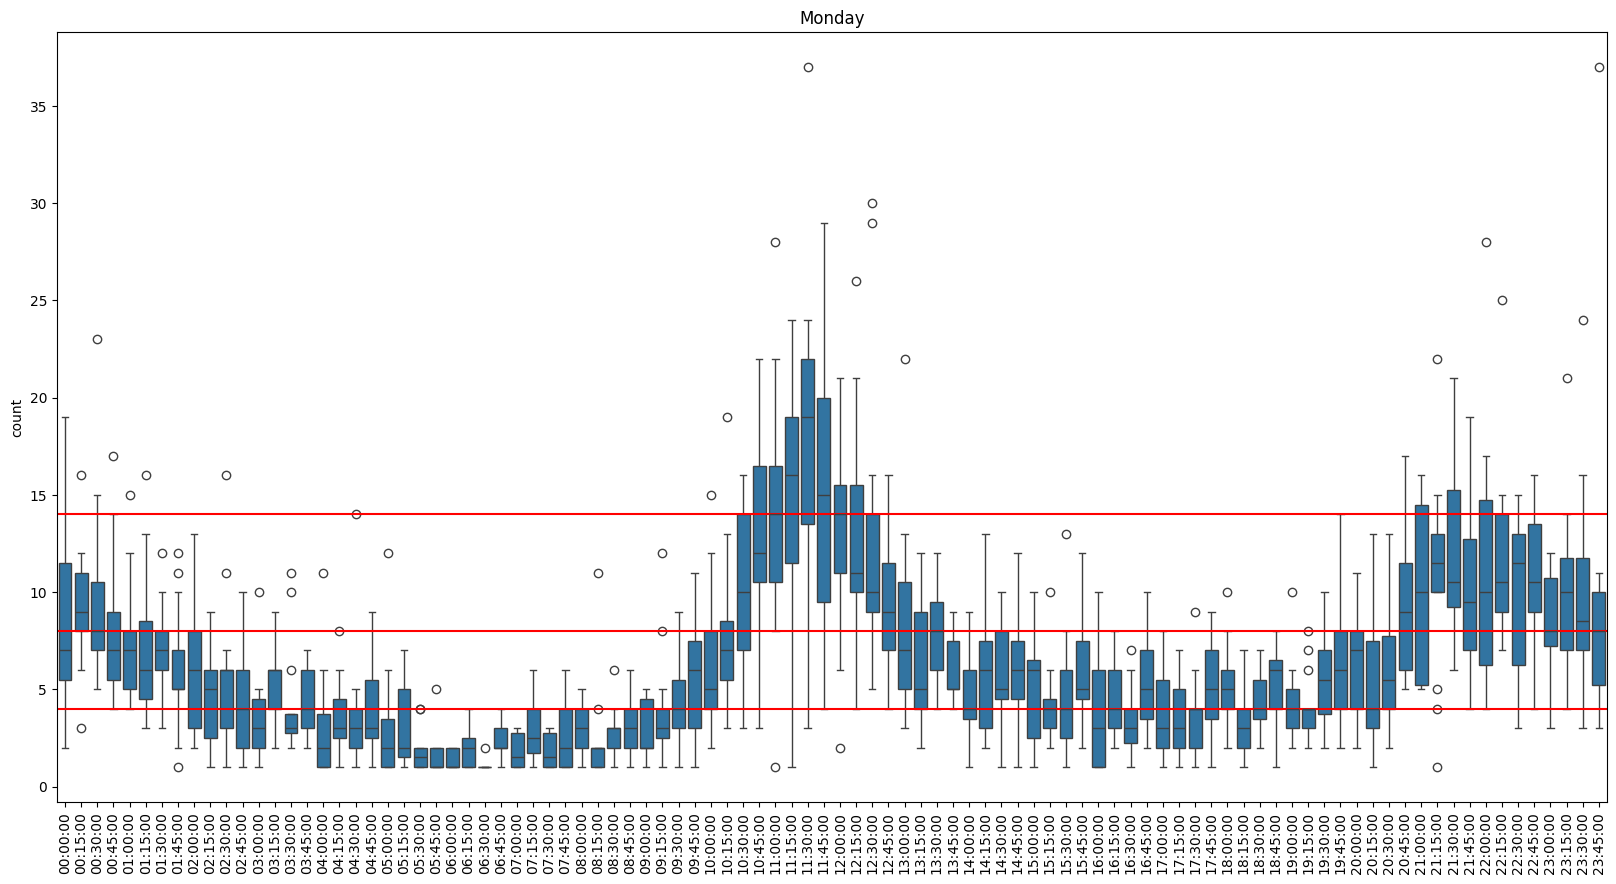

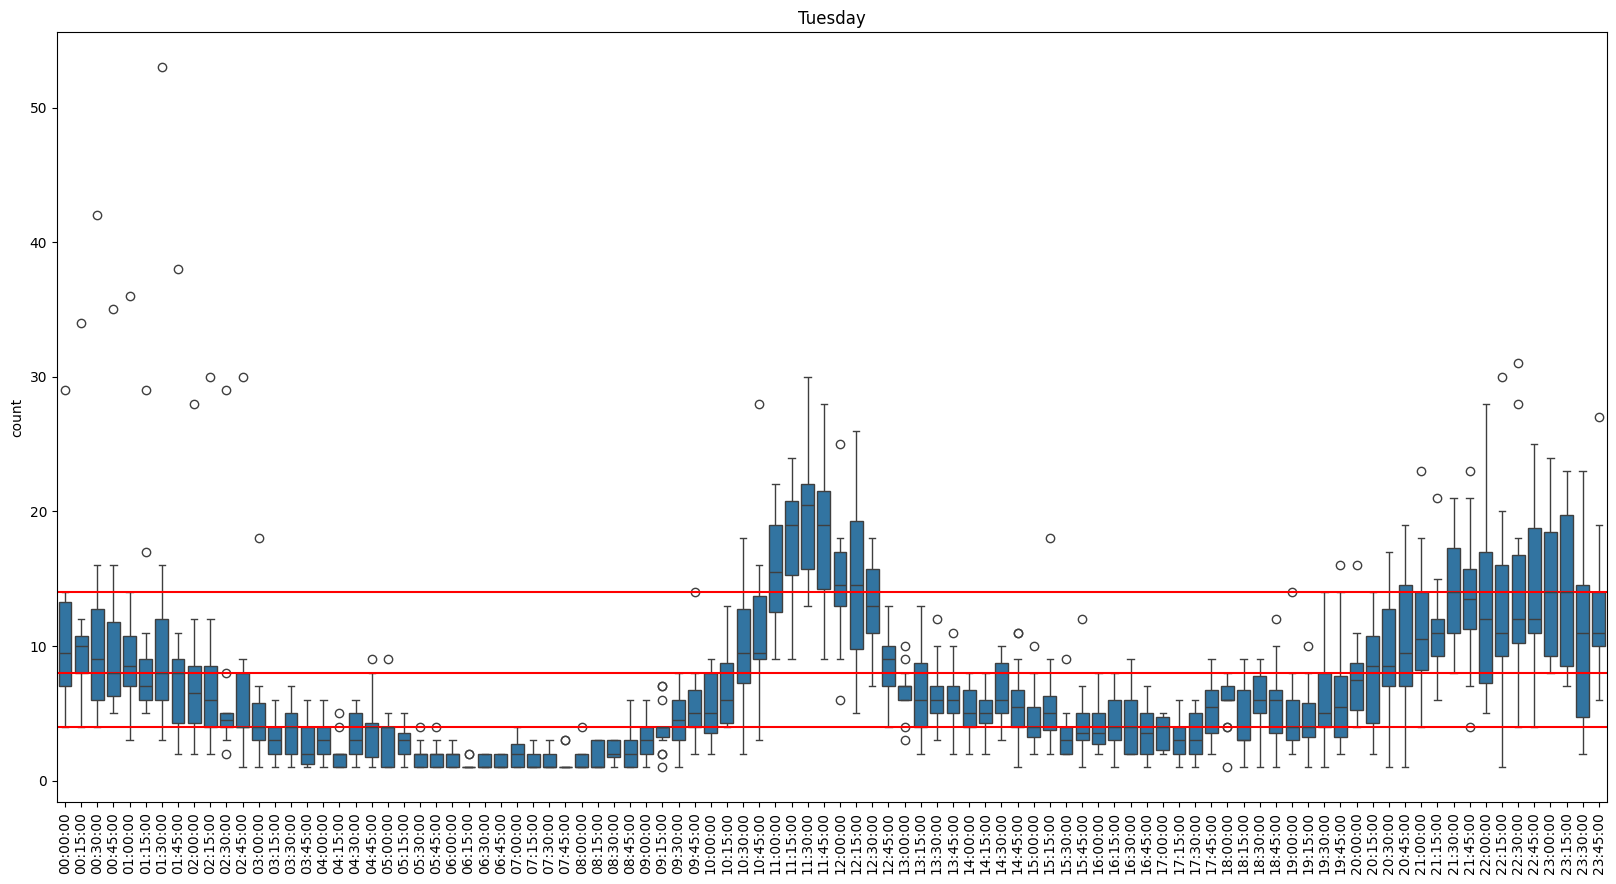

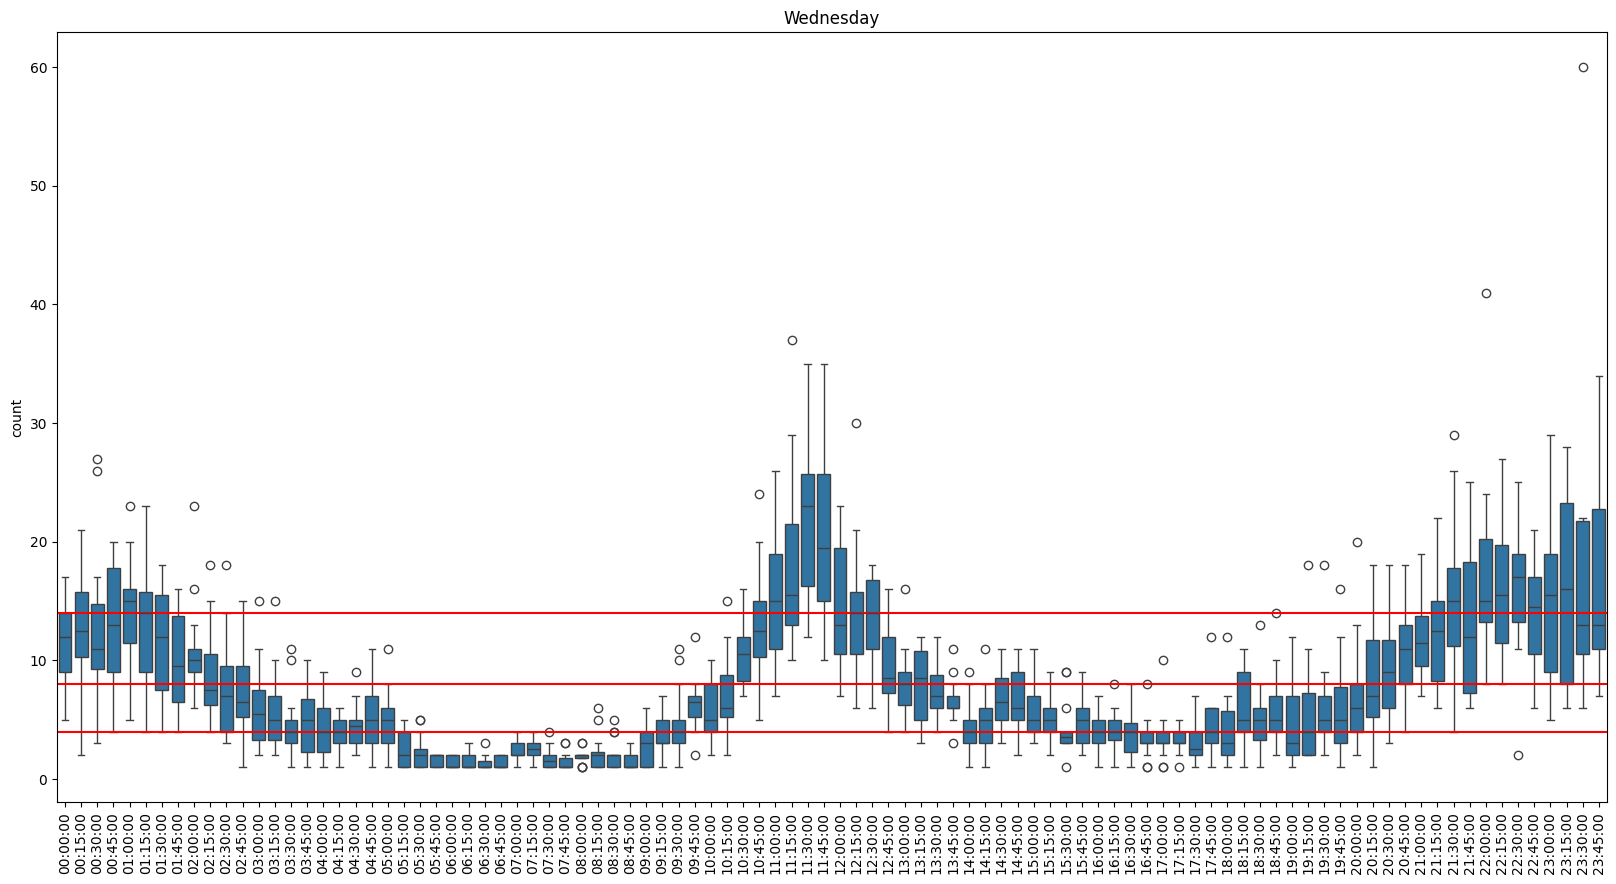

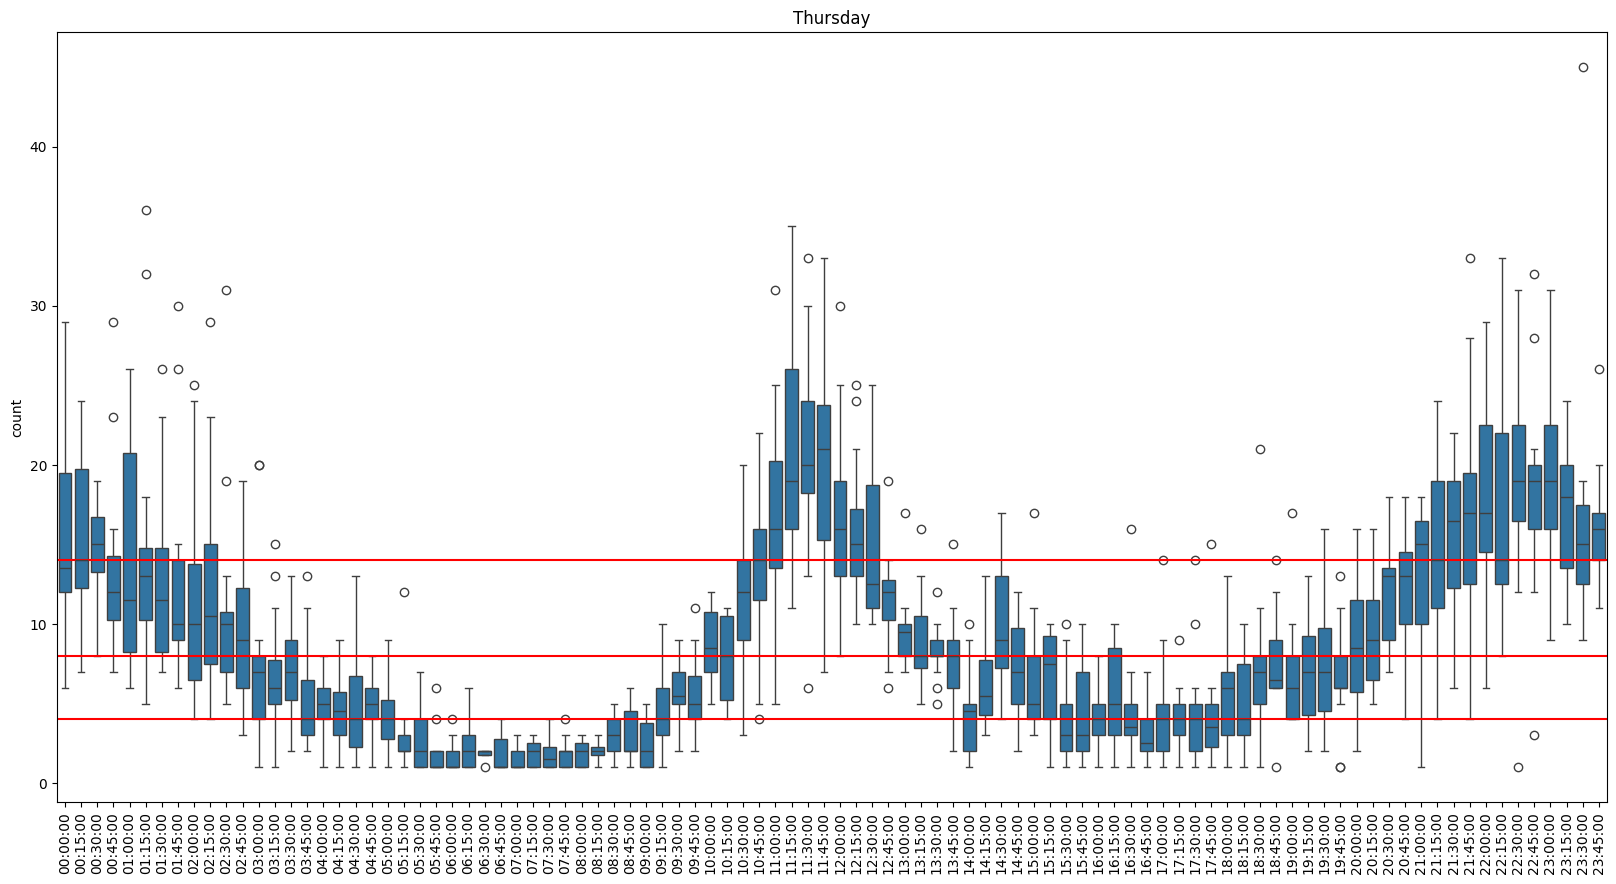

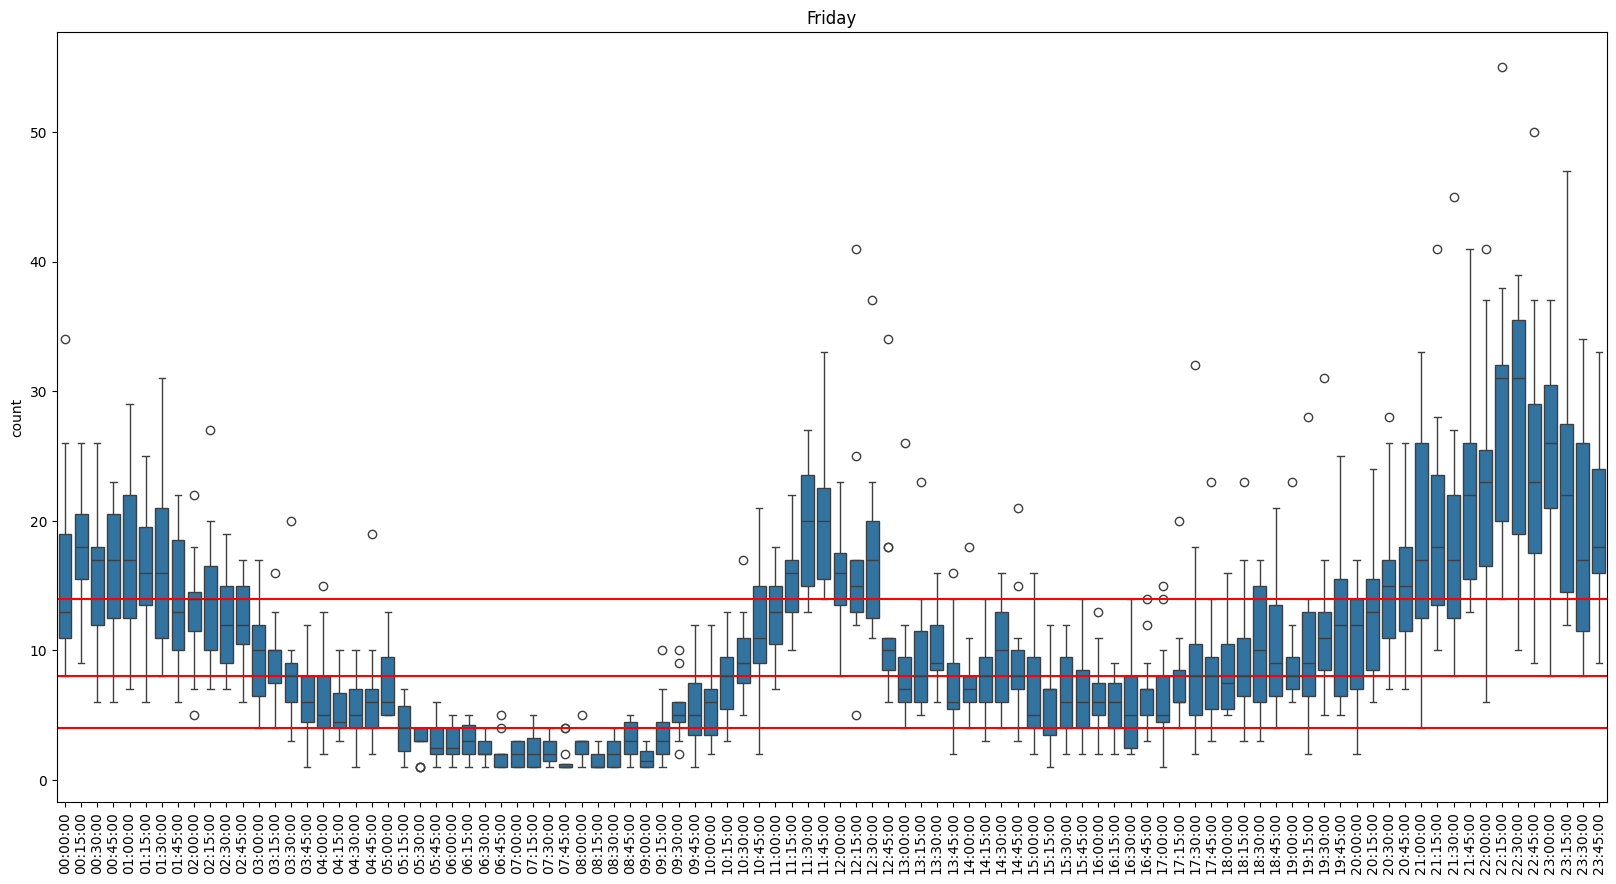

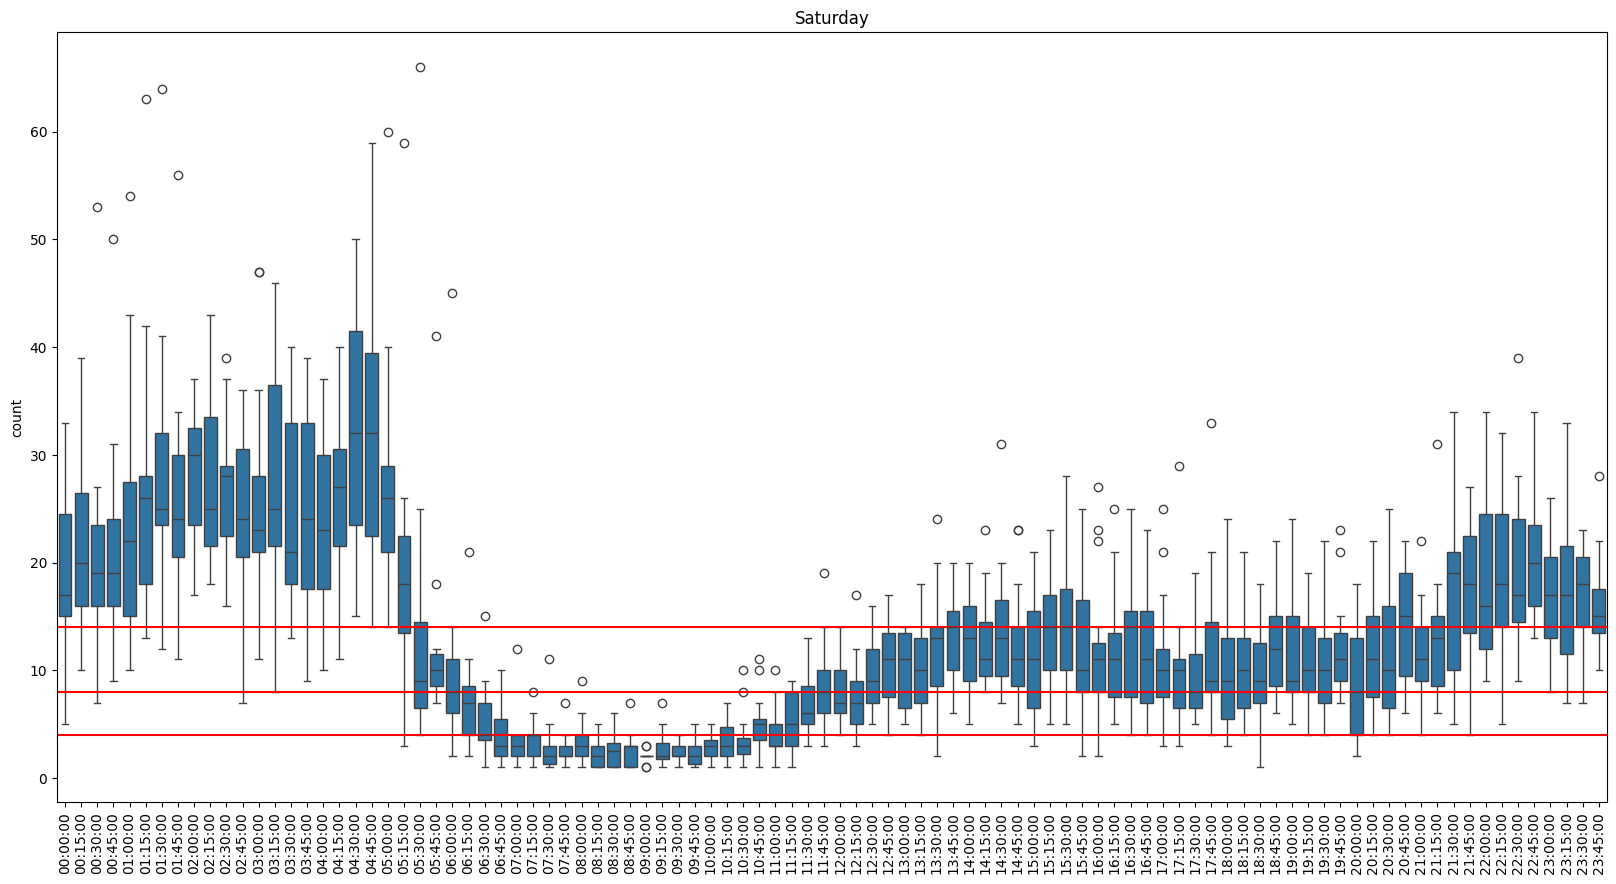

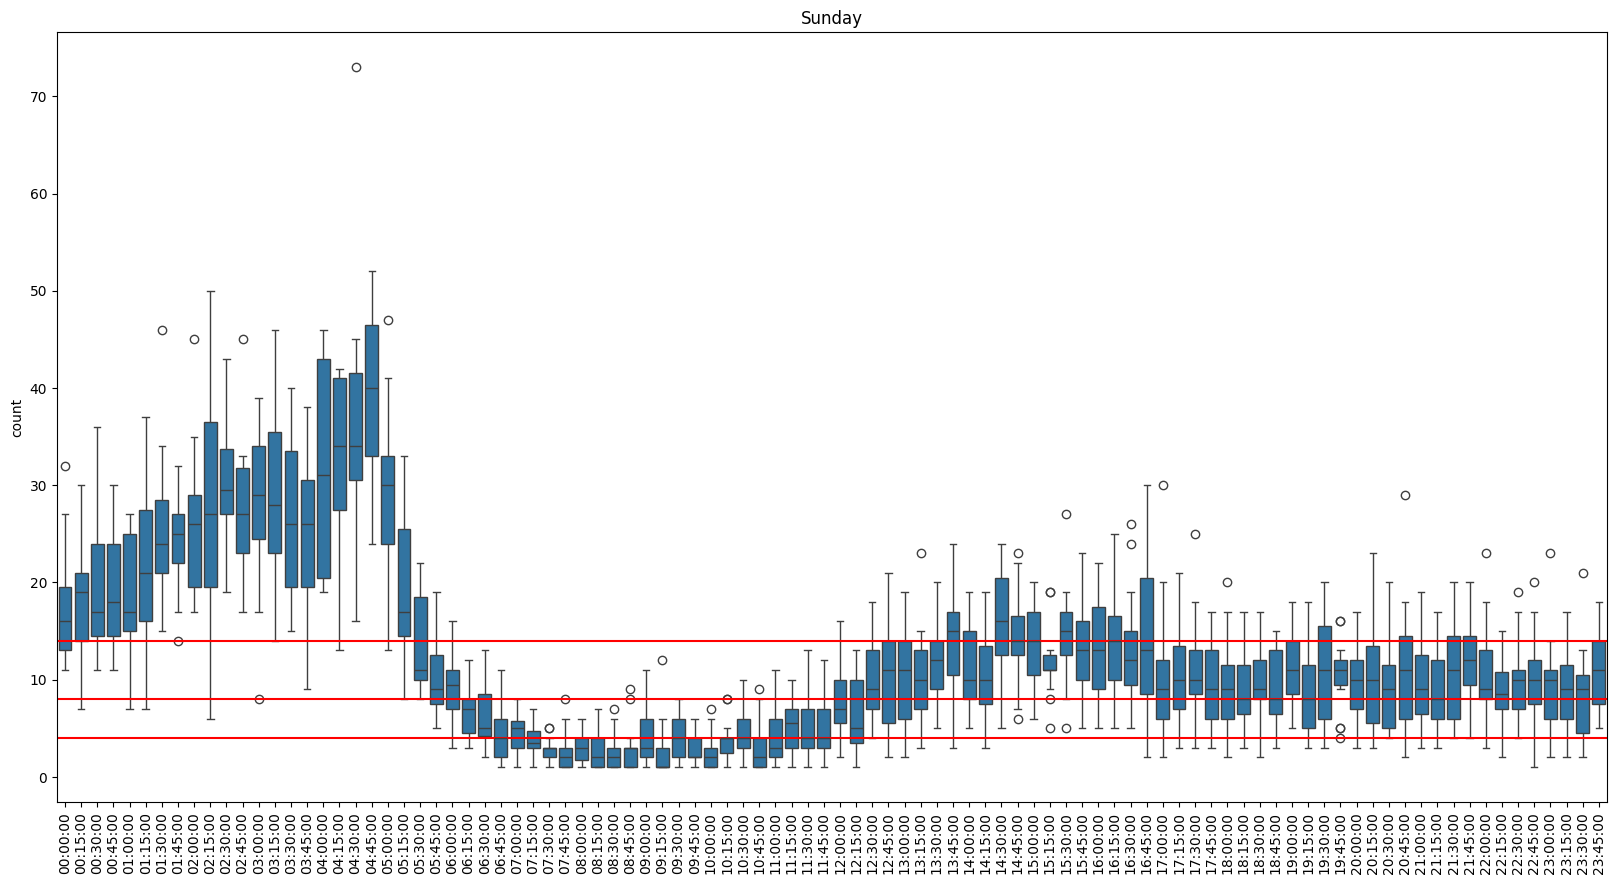

In [37]:
for day in weekday:
    plt.figure(figsize=(20, 10))
    data=login_count_df[login_count_df['day_of_week']==day]
    graph = sns.boxplot(data=data, x=data.index.time, y='count', order=time_list)
    graph.axhline(login_25, color='r')
    graph.axhline(login_50, color='r')
    graph.axhline(login_75, color='r')
    plt.title('{}'.format(day))
    plt.xticks(rotation=90)
    plt.show()

* **There are some interesting insights from the boxplot for each day of the week.**
* **The login patterns are quite similiar for weekdays, which peaks around noon and night. Friday has higher peak at night than the other weekdays.**
* **This pattern is quite reasonable. The peak at noon maybe because it is lunch time, so people tend to ride more. The Friday night and Saturday night peak maybe because it is the time that most people going out during the week.**
* **Saturday and Sunday have different patterns with the other weekdays. The peaks are around 00:00 to 06:00.**

# Part 2

**Key Measure of Success:**

The primary metric to measure the success of encouraging driver partners to serve both cities would be the increase in the number of drivers crossing the toll bridge. The goal is to achieve a significant rise in the frequency of drivers traversing between the cities. This metric directly reflects the adoption of reimbursing toll costs and the willingness of driver partners to work in both cities, thus addressing the issue of exclusive city operations.

**Practical Experiment Design:**
a) Implementation: A practical experiment could involve two phases. In the first phase, you would collect data on the number of drivers crossing the toll bridge before the reimbursement policy is implemented. The second phase would entail implementing the toll reimbursement policy and collecting data after the policy is in place.
b) Statistical Test(s): A hypothesis test can be conducted to compare the means of the number of drivers crossing the toll bridge before and after the policy change. A two-sample t-test or a z-test, depending on the data distribution and sample size, could be used to determine whether the mean difference is statistically significant.
c) Interpreting Results and Recommendations: If the hypothesis test shows a statistically significant increase in the number of drivers crossing the toll bridge after the policy implementation, it would suggest that the reimbursement policy has been effective in encouraging driver partners to serve both cities. Recommendations could include the continuation of the policy and even extending it to other city services, promoting inter-city collaborations. However, it is crucial to consider any confounding variables, external factors, or changes in traffic patterns, as they could influence the results.

**Note**
This experiment should be conducted over a reasonable duration to capture potential variations in traffic patterns, account for seasonal changes, and obtain a more robust understanding of the impact of the policy change.